## PreProcessing

In [31]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv')

# Combine all lines from the same work and subdivision
df['Lyrics'] = df.groupby(['Work Title', 'Subdivision Title'])['Line'].transform(lambda x: ' '.join(x))

# Drop duplicates to keep only combined lyrics for each subdivision
df = df.drop_duplicates(subset=['Work Title', 'Subdivision Title', 'Lyrics'])

df.head()


,Work Title,Subdivision Title,Line,Lyrics
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am,i am sam i am sam sam i am
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam,that samiam that samiam i do not like that samiam
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham,do would you like green eggs and ham
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam,i do not like themsamiam i do not like green e...
5,green eggs and ham by doctor seuss,stanza 5,would you like them here or there,would you like them here or there


**Word Tokenizer**

In [32]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize the lyrics
df['word_tokens'] = df['Lyrics'].apply(lambda x: word_tokenize(x.lower()))

# Display the dataframe
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Work Title,Subdivision Title,Line,Lyrics,word_tokens
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am,i am sam i am sam sam i am,"[i, am, sam, i, am, sam, sam, i, am]"
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam,that samiam that samiam i do not like that samiam,"[that, samiam, that, samiam, i, do, not, like,..."
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham,do would you like green eggs and ham,"[do, would, you, like, green, eggs, and, ham]"
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam,i do not like themsamiam i do not like green e...,"[i, do, not, like, themsamiam, i, do, not, lik..."
5,green eggs and ham by doctor seuss,stanza 5,would you like them here or there,would you like them here or there,"[would, you, like, them, here, or, there]"


**custom tokenizer to handle word and line-level tokenization, and to capture repeated phrases.**

In [33]:
def custom_tokenize(lyrics):
    # Tokenize into lines first
    lines = lyrics.split('\n')
    all_tokens = []
    
    for line in lines:
        # Tokenize each line into words
        words = word_tokenize(line.lower())
        all_tokens.extend(words)
        
        # Additional custom tokenization logic can go here
        # For example, capturing phrases or handling rhymes
        phrases = line.split(',')
        all_tokens.extend(phrases)
    
    return all_tokens

# Apply custom tokenization to the lyrics
df['Tokens_0'] = df['Lyrics'].apply(custom_tokenize)

# Display the dataframe with tokens
df.head()


,Work Title,Subdivision Title,Line,Lyrics,word_tokens,Tokens_0
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am,i am sam i am sam sam i am,"[i, am, sam, i, am, sam, sam, i, am]","[i, am, sam, i, am, sam, sam, i, am, i am sam ..."
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam,that samiam that samiam i do not like that samiam,"[that, samiam, that, samiam, i, do, not, like,...","[that, samiam, that, samiam, i, do, not, like,..."
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham,do would you like green eggs and ham,"[do, would, you, like, green, eggs, and, ham]","[do, would, you, like, green, eggs, and, ham, ..."
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam,i do not like themsamiam i do not like green e...,"[i, do, not, like, themsamiam, i, do, not, lik...","[i, do, not, like, themsamiam, i, do, not, lik..."
5,green eggs and ham by doctor seuss,stanza 5,would you like them here or there,would you like them here or there,"[would, you, like, them, here, or, there]","[would, you, like, them, here, or, there, woul..."


**1. Word Tokenizer: To capture individual words and their repetitions.**

**2. Sentence/Line Tokenizer: To capture the structure of verses and lines.**

**3. Custom Tokenizer: To capture common phrases and rhymes.**

**

In [34]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

def custom_tokenize(lyrics):
    # Tokenize into sentences
    sentences = sent_tokenize(lyrics)
    all_tokens = []
    
    for sentence in sentences:
        # Tokenize each sentence into words
        words = word_tokenize(sentence.lower())
        all_tokens.extend(words)
        
        # Additional custom tokenization logic can go here
        # For example, splitting into phrases or handling rhymes
        # Example: Split by common phrases or line breaks
        phrases = sentence.split(',')
        all_tokens.extend(phrases)
    
    return all_tokens

# Apply custom tokenization to the lyrics
df['Tokens_1'] = df['Lyrics'].apply(custom_tokenize)

# Display the dataframe
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Work Title,Subdivision Title,Line,Lyrics,word_tokens,Tokens_0,Tokens_1
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am,i am sam i am sam sam i am,"[i, am, sam, i, am, sam, sam, i, am]","[i, am, sam, i, am, sam, sam, i, am, i am sam ...","[i, am, sam, i, am, sam, sam, i, am, i am sam ..."
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam,that samiam that samiam i do not like that samiam,"[that, samiam, that, samiam, i, do, not, like,...","[that, samiam, that, samiam, i, do, not, like,...","[that, samiam, that, samiam, i, do, not, like,..."
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham,do would you like green eggs and ham,"[do, would, you, like, green, eggs, and, ham]","[do, would, you, like, green, eggs, and, ham, ...","[do, would, you, like, green, eggs, and, ham, ..."
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam,i do not like themsamiam i do not like green e...,"[i, do, not, like, themsamiam, i, do, not, lik...","[i, do, not, like, themsamiam, i, do, not, lik...","[i, do, not, like, themsamiam, i, do, not, lik..."
5,green eggs and ham by doctor seuss,stanza 5,would you like them here or there,would you like them here or there,"[would, you, like, them, here, or, there]","[would, you, like, them, here, or, there, woul...","[would, you, like, them, here, or, there, woul..."


**Train FastText Model on Tokenized Lyrics**

1. using custom tokenizer_0

In [35]:
from gensim.models import FastText

# Prepare data for FastText
sentences = df['Tokens_0'].tolist()

# Train FastText model
model_0 = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Prepare data for FastText
sentences = df['Tokens_1'].tolist()

# Train FastText model
model_1 = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

sentences = df['word_tokens'].tolist()

# Train FastText model
model_word = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)



**Recurrence Plot and Self-Similarity Matrix**

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_recurrence_plot(tokens, embedding_model):
    vectors = [embedding_model.wv[token] for token in tokens if token in embedding_model.wv]
    similarity_matrix = np.inner(vectors, vectors)
    return similarity_matrix

def create_self_similarity_matrix(tokens, embedding_model):
    vectors = [embedding_model.wv[token] for token in tokens if token in embedding_model.wv]
    similarity_matrix = np.zeros((len(vectors), len(vectors)))
    
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            similarity_matrix[i, j] = np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j]))
    
    return similarity_matrix

Word Tokenizer model

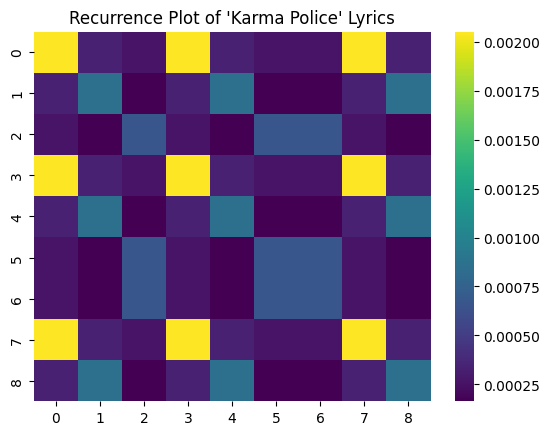

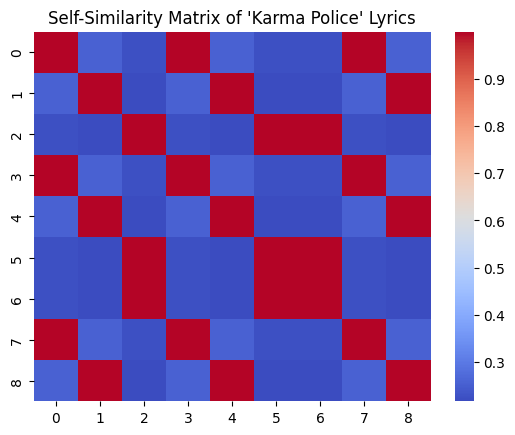

In [37]:
# Select all tokens for the work title "Karma Police"
specific_lyrics = df.loc[df['Work Title'] == 'green eggs and ham by doctor seuss', 'word_tokens'].values[0]

# Create and plot recurrence plot
similarity_matrix = create_recurrence_plot(specific_lyrics, model_word)
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title("Recurrence Plot of 'Karma Police' Lyrics")
plt.show()

# Create and plot self-similarity matrix
self_similarity_matrix = create_self_similarity_matrix(specific_lyrics, model_word)
sns.heatmap(self_similarity_matrix, cmap='coolwarm')
plt.title("Self-Similarity Matrix of 'Karma Police' Lyrics")
plt.show()

token_0

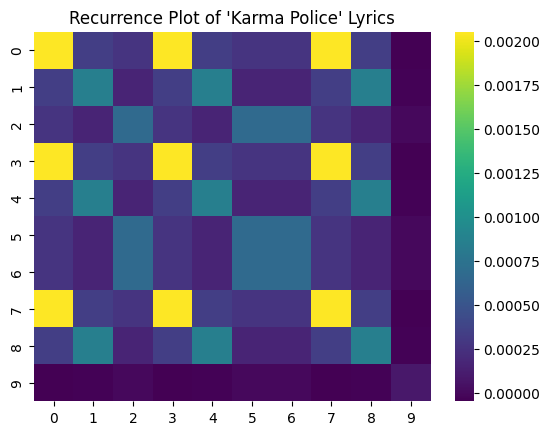

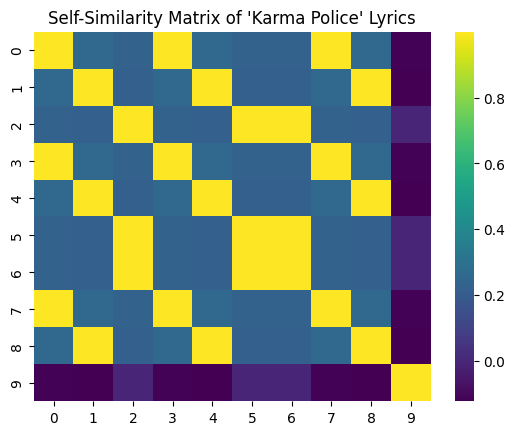

In [45]:
# Select all tokens for the work title "Karma Police"
specific_lyrics = df.loc[df['Work Title'] == 'green eggs and ham by doctor seuss', 'Tokens_0'].values[0]

# Create and plot recurrence plot
similarity_matrix = create_recurrence_plot(specific_lyrics, model_word)
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title("Recurrence Plot of 'Karma Police' Lyrics")
plt.show()

# Create and plot self-similarity matrix
self_similarity_matrix = create_self_similarity_matrix(specific_lyrics, model_word)
sns.heatmap(self_similarity_matrix, cmap='viridis')
plt.title("Self-Similarity Matrix of 'Karma Police' Lyrics")
plt.show()

In [44]:

# Select a specific work and subdivision
specific_lyrics = df.loc[(df['Work Title'] == 'karma police') & (df['Subdivision Title'] == 'verse 1'), 'word_tokens'].values[0]

# Create and plot recurrence plot
similarity_matrix = create_recurrence_plot(specific_lyrics, model_1)
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title("Recurrence Plot of Selected Lyrics")
plt.show()

# Create and plot self-similarity matrix
self_similarity_matrix = create_self_similarity_matrix(specific_lyrics, model_1)
sns.heatmap(self_similarity_matrix, cmap='v')
plt.title("Self-Similarity Matrix of Selected Lyrics")
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

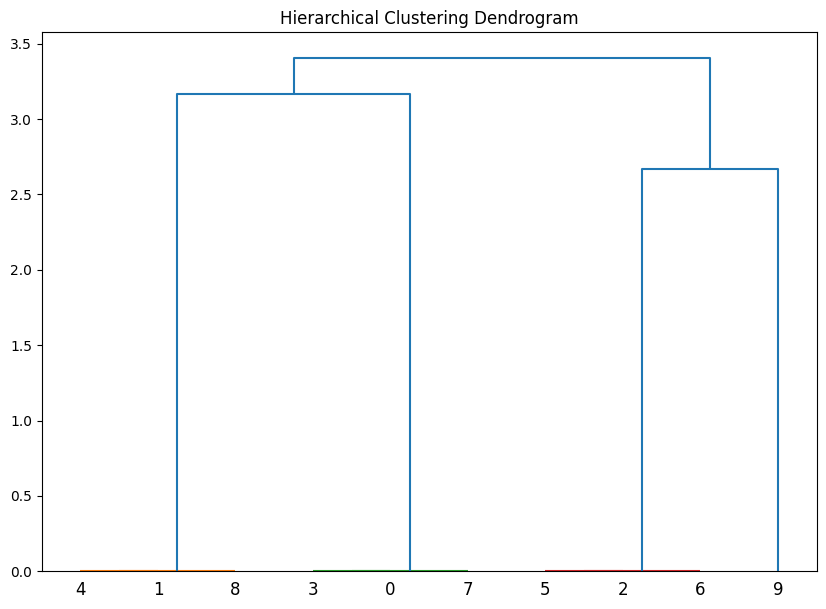

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical_clustering(similarity_matrix):
    linked = linkage(similarity_matrix, 'ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.show()

hierarchical_clustering(self_similarity_matrix)
